# Simon's Algorithm

In this section, we first introduce the Simon problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit, and run on a simulator and device.


## Contents

1. [Introduction](#introduction)     
   1.1 [Simon's Problem](#problem)    
   1.2 [Simon's Algorithm](#algorithm)
2. [Example](#example)
3. [Qiskit Implementation](#implementation)     
   3.1 [Simulation](#simulation)     
   3.2 [Device](#device)     
4. [Oracle](#oracle)
5. [Problems](#problems)
6. [References](#references)

## 1. Introduction <a id='introduction'></a>

Simon's algorithm, first introduced in Reference [1], was the first quantum algorithm to show an exponential speed-up versus the best classical algorithm in solving a specific problem. This inspired the quantum algorithm for the discrete Fourier transform, also known as quantum Fourier transform, which is used in the most famous quantum algorithm: Shor's factoring algorithm.

### 1a. Simon's Problem <a id='problem'> </a>

We are given an unknown blackbox function $f$, which is guaranteed to be either one-to-one or two-to-one, where one-to-one and two-to-one functions have the following properties:

- _one-to-one_: maps exactly one unique output for every input, eg. $f(1) \rightarrow 1$, $f(2) \rightarrow 2$, $f(3) \rightarrow 3$, $f(4) \rightarrow 4$. 
- _two-to-one_: maps exactly two inputs to every unique output, eg. $f(1) \rightarrow 1$, $f(2) \rightarrow 2$, $f(3) \rightarrow 1$, $f(4) \rightarrow 2$, according to a hidden bitstring, $s$
$$
\textrm{where:  given }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{it is guaranteed }: \quad x_1 \oplus x_2 = s
$$

Thus, given this blackbox $f$, how quickly can we determine if $f$ is one-to-one or two-to-one? Then, if $f$ turns out to be two-to-one, how quickly can we determine $s$? As it turns out, both cases boil down to the same problem of finding $s$, where a bitstring of $s={000...}$ represents the one-to-one $f$.

### 1b. Simon's Algorithm <a id='algorithm'> </a>

#### Classical Solution

Classically, if we want to know what $s$ is for a given $f$, with 100% certainty, we have to check up to $2^{N−1}+1$  inputs, where N is the number of bits in the input. This means checking just over half of all the possible inputs until we find two cases of the same output. Although, probabilistically the average number of inputs will be closer to the order of $\mathcal(o)(2)$. Much like the Deutsch-Jozsa problem, if we get lucky, we could solve the problem with our first two tries. But if we happen to get an $f$ that is one-to-one, or get _really_ unlucky with an $f$ that’s two-to-one, then we’re stuck with the full $2^{N−1}+1$.

#### Quantum Solution

The quantum circuit that implements Simon's algorithm is shown below.

![image1](images/simon_steps.jpeg)

Where the query function, $\text{Q}_f$ acts on two quantum registers as:


$$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$



The algorithm involves the following steps.
<ol>
   <li> Two $n$-qubit input registers are initialized to the zero state: 
    

$$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

 </li>
    
   <li> Apply a Hadamard transform to the first register:
    

$$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

 
   </li>
    
   <li> Apply the query function $\text{Q}_f$: 
    

$$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle  $$

 
   </li>
    
   <li> Measure the second register. A certain value of $f(x)$ will be observed. Because of the setting of the problem, the observed value $f(x)$ could correspond to two possible inputs: $x$ and $y = x \oplus s $. Therefore the first register becomes:
    

$$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$


   where we omitted the second register since it has been measured. 
   </li>
    
   <li> Apply Hadamard on the first register:
    

$$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$


   </li>
    
   <li> Measuring the first register will give an output of:
    

$$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$


   which means:
    $$ x \cdot z = y \cdot z \\
     x \cdot z = \left( x \oplus s \right) \cdot z \\
     x \cdot z = x \cdot z \oplus s \cdot z \\
     s \cdot z = 0 \text{ (mod 2)} $$
      
   A string $z$ whose inner product with $s$ will be measured. Thus, repeating the algorithm $\approx n$ times, we will be able to obtain $n$ different values of $z$ and the following system of equation can be written:
       
    

$$ \begin{cases} s \cdot z_1 = 0 \\ s \cdot z_2 = 0 \\ ... \\ s \cdot z_n = 0 \end{cases}$$


       
   From which $s$ can be determined, for example by Gaussian elimination.
    </li>
</ol>

So, in this particular problem the quantum algorithm performs exponentially fewer steps than the classical one. Once again, it might be difficult to envision an application of this algorithm (although it inspired the most famous algorithm created by Shor) but it represents the first proof that there can be an exponential speed-up in solving a specific problem by using a quantum computer rather than a classical one.

## 2. Example  <a id='example'></a>

Let's see the example of Simon's algorithm for 2 qubits with the secret string $s=11$, so that $f(x) = f(y)$ if $y = x \oplus s$. The quantum circuit to solve the problem is:

![image2](images/simon_example.jpeg)

<ol>
    <li> Two $2$-qubit input registers are initialized to the zero state:
    

$$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> Apply Hadamard gates to the qubits in the first register:
    

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

 </li>
    
   <li> For the string $s=11$, the query function can be implemented as $\text{Q}_f = CX_{13}CX_{14}CX_{23}CX_{24}$:
    \begin{aligned}
     \lvert \psi_3 \rangle  = \frac{1}{2} \left(\lvert 0 0 \rangle_1  \lvert 0\oplus 0 \oplus 0, 0 \oplus 0 \oplus 0 \rangle_2 \\
            + \lvert 0 1 \rangle_1 \lvert 0\oplus 0 \oplus 1, 0 \oplus 0 \oplus 1 \rangle_2 \\
            + \lvert 1 0 \rangle_1 \lvert 0\oplus 1 \oplus 0, 0 \oplus 1 \oplus 0 \rangle_2 \\
            + \lvert 1 1 \rangle_1 \lvert 0\oplus 1 \oplus 1, 0 \oplus 1 \oplus 1 \rangle_2 \right)
    \end{aligned}
    
   Thus
    

$$ \lvert \psi_3 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 + \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 + \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 + \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 \right)  $$


    
    
   </li>
    
   <li> We measure the second register. With $50\%$ probability we will see either $\lvert  0   0  \rangle_2$ or $\lvert  1   1  \rangle_2$. For the sake of the example, let us assume that we see $\lvert  1   1  \rangle_2$. The state of the system is then
    

$$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$


    
   where we omitted the second register since it has been measured.
    
   </li>
    
    
    
   <li> Apply Hadamard on the first register
    $$ \lvert \psi_5 \rangle = \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle   + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
    = \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)$$
    
   </li>
    
   <li> Measuring the first register will give either $\lvert 0, 0 \rangle$ or $\lvert 1, 1 \rangle$ with equal probability. If we see $\lvert 1, 1 \rangle$, then:   
    

$$ s \cdot 11 = 0 $$


    
   This is one equation, but $s$ has two variables. Therefore, we need to repeat the algorithm at least another time to have enough equations that will allow us to determine $s$.
   </li>
</ol>

## 3. Qiskit Implementation <a id='implementation'></a>

We now implement Simon's algorithm for the above [example](example) for $2$-qubits with a $s=11$.

In [1]:
#initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
s = '11'

In Qiskit, measurements are only allowed at the end of the quantum circuit. In the case of Simon's algorithm, this simply means that we need to move the measurements on the second register to the end.

In [3]:
# Creating registers
# qubits and classical bits for querying the oracle and finding the hidden period s
n = 2*len(str(s))
simonCircuit = QuantumCircuit(n)
barriers = True

# Apply Hadamard gates before querying the oracle
simonCircuit.h(range(len(str(s))))    
    
# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply the query function
## 2-qubit oracle for s = 11
simonCircuit.cx(0, len(str(s)) + 0)
simonCircuit.cx(0, len(str(s)) + 1)
simonCircuit.cx(1, len(str(s)) + 0)
simonCircuit.cx(1, len(str(s)) + 1)  

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply Hadamard gates to the input register
simonCircuit.h(range(len(str(s))))

# Measure ancilla qubits
simonCircuit.measure_all()

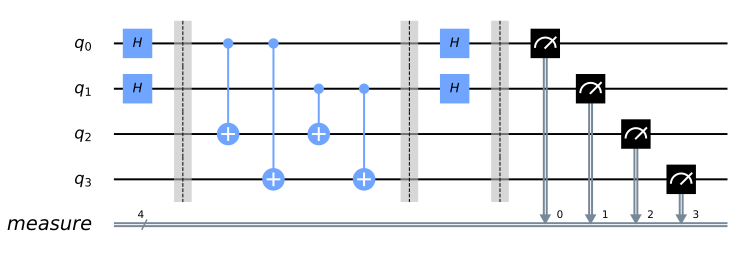

In [4]:
simonCircuit.draw(output='mpl')

### 3a. Experiment with Simulators  <a id='simulation'></a>

We can run the above circuit on the simulator. 

{'00': 481, '11': 543}


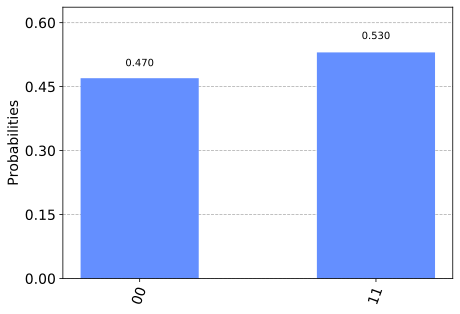

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [6]:
# Calculate the dot product of the results
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


Using these results, we can recover the value of $s = 11$.

### 3b. Experiment with Real Devices  <a id='device'></a>

We can run the circuit on the real device as below.

In [7]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_london


In [8]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(simonCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


{'00': 481, '11': 543}


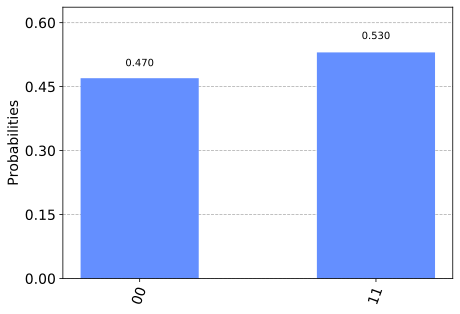

In [9]:
# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [10]:
# Calculate the dot product of the most significant results
print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    if answer_plot[z_rev] >= 0.1*shots:
        z = z_rev[::-1]
        print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


As we can see, the most significant results are those for which $s.z = 0$ (mod 2). Using a classical computer, we can then recover the value of $s$ by solving the linear system of equations. For this $n=2$ case, $s = 11$.

## 4. Oracle <a id='oracle'></a>

The above [example](#example) and [implementation](#implementation) of Simon's algorithm are specifically for $s=11$. To extend the problem to other secret bit strings, we need to discuss the Simon query function or oracle in more detail.

The Simon algorithm deals with finding a hidden bitstring $s \in \{0,1\}^n$ from an oracle $f_s$ that satisfies $f_s(x) = f_s(y)$ if and only if $y = x \oplus s$ for all $x \in \{0,1\}^n$.  Here, the $\oplus$ is the bitwise XOR operation. Thus, if $s = 0\ldots 0$, i.e., the all-zero bitstring, then $f_s$ is a 1-to-1 (or, permutation) function. Otherwise, if $s \neq 0\ldots 0$, then $f_s$ is a 2-to-1 function. 

In the algorithm, the oracle receives $|x\rangle|0\rangle$ as input. With regards to a predetermined $s$, the oracle writes its output to the second register so that it transforms the input to $|x\rangle|f_s(x)\rangle$ such that $f(x) = f(x\oplus s)$ for all $x \in \{0,1\}^n$. 

Such a blackbox function can be realized by the following procedures.

-  Copy the content of the first register to the second register.
$$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

-  **(Creating 1-to-1 or 2-to-1 mapping)** If $s$ is not all-zero, then there is the least index $j$ so that $s_j = 1$. If $x_j = 0$, then XOR the second register with $s$. Otherwise, do not change the second register.
$$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus s\rangle~\mbox{if}~x_j = 0~\mbox{for the least index j}
$$

-  **(Creating random permutation)** Randomly permute and flip the qubits of the second register.
$$
|x\rangle|y\rangle \rightarrow |x\rangle|f_s(y)\rangle
$$


## 5. Problems <a id='problems'></a>

1. Implement a general Simon oracle.
2. Test your general Simon oracle with the secret bitstring $s=1001$, on a simulator and device. Are the results what you expect? Explain.

## 6. References <a id='references'></a>

1. Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483, [doi:10.1137/S0097539796298637](https://doi.org/10.1137/S0097539796298637)

In [11]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}